In [6]:
import cv2
import pytesseract
import pandas as pd
import numpy as np
from PIL import Image
import os

In [5]:
X = pd.read_csv("../raw_data/train_x.csv", delimiter=" ", index_col="Id")
y = pd.read_csv("../raw_data/train_y.csv", delimiter=" ", index_col="Id")
y_umbr = np.load("../raw_data/tmp_data/y_train_umbr.npy", encoding='bytes', allow_pickle=True)

In [7]:
X

,Image_name,Title
Id,,
0,1588345297.jpg,With Schwarzkopf: Life Lessons of The Bear
1,1404803335.jpg,"Magnets: Pulling Together, Pushing Apart (Amaz..."
2,1446276082.jpg,Energy Security (SAGE Library of International...
3,1491522666.jpg,An Amish Gathering: Life in Lancaster County
4,0970096410.jpg,City of Rocks Idaho: A Climber's Guide (Region...
...,...,...
51295,0399176055.jpg,Extreme Prey
51296,0719816629.jpg,The Crime Writer's Guide to Police Practice an...
51297,0385353596.jpg,The Jezebel Remedy: A novel


In [14]:
X['Image_name'][0]

'1588345297.jpg'

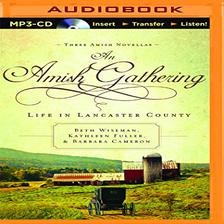

In [42]:
Image.open(os.path.join("../raw_data/Images/", X['Image_name'][3]))

In [53]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [54]:
image_path = os.path.join("../raw_data/Images/", X['Image_name'][1])
    
image = cv2.imread(image_path)

In [55]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [60]:
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'

for i in range(50):
    image_path = os.path.join("../raw_data/Images/", X['Image_name'][i])
    
    # Load image
    image = cv2.imread(image_path)
    
    gray = get_grayscale(image)
    thresh = thresholding(gray)
    #opening_f = opening(gray)
    #canny = canny(gray)
    #blurred_image = cv2.GaussianBlur(gray, (3, 3), 0)

    
    # Apply Pytesseract
    title = pytesseract.image_to_string(thresh)

    # Split the extracted text into lines
    lines = title.split('\n')

    # Print the lines for the current image
    print(f"Lines from Image {i+1}:")
    for line in lines:
        print(line)

    print()  # Print an empty line between each image

Lines from Image 1:
chWarzkopf

ke

Life Lessons
of The BEAR



Lines from Image 2:


Lines from Image 3:
BNERGY SECURITY



Lines from Image 4:


Lines from Image 5:


Lines from Image 6:
COMO VENCER EL



Lines from Image 7:
JOHN MARTIN
LITTLEJOHN

AN ENIGMA OF OSTEOPATHY


Lines from Image 8:
e
ACLSIASH



Lines from Image 9:
Mosby's
ONCOLOGY
NURSING
ADVISOR

A.Comprehensive

Guide to Clinical Practice



Lines from Image 10:


Lines from Image 11:
Israel

& the Palestinian



Lines from Image 12:


Lines from Image 13:
Breads, Cakes,

_—

ae


Lines from Image 14:


Lines from Image 15:
= woop SPIRITS

by “and GREEN MEI



Lines from Image 16:
Janice VARCLEave's

iE Se
EXPERIMENTS


Lines from Image 17:
MAKING SENSE“
Tantric Buddhism


Lines from Image 18:
THE MAKING!
OF GLOBAL
CAPITALISM

THE POLITICAL ECONOMY
OF AMERICAN EMPIRE

CEO ARITA SAB IN

ene “aggre



Lines from Image 19:


Lines from Image 20:
Advances In
Renal

Transplantation


Lines from Image 21:
Band Theory and
Ele